In [ ]:
!pip install yfinance
import yfinance as yf
ticker = 'MSFT'
msft_data = yf.Ticker(ticker)

# Fetch the last 5 years of historical data
five_years_data = msft_data.history(period='5y')
print(five_years_data.head())


five_years_data.to_csv('msft_stock.csv')


from google.colab import files
files.download('msft_stock.csv')

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-09 00:00:00-05:00  154.797576  155.161045  154.022825  155.036697   
2020-01-10 00:00:00-05:00  155.734960  156.117548  154.166310  154.319351   
2020-01-13 00:00:00-05:00  154.721125  156.203681  154.242883  156.174988   
2020-01-14 00:00:00-05:00  156.280163  156.481032  154.682834  155.074997   
2020-01-15 00:00:00-05:00  155.543670  156.806238  155.495858  156.079300   

                             Volume  Dividends  Stock Splits  
Date                                                          
2020-01-09 00:00:00-05:00  21385000        0.0           0.0  
2020-01-10 00:00:00-05:00  20725900        0.0           0.0  
2020-01-13 00:00:00-05:00  21626500        0.0           0.0  
2020-01-14 00:00:00-05:00  23477400        0.0           0.0  
2020-01-15 00:00:00-05:00  21417900        0.0           0.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import files
uploaded = files.upload()


Saving msft_stock.csv to msft_stock (1).csv


In [15]:
import pandas as pd

df = pd.read_csv('msft_stock.csv')

df = df[['Date', 'Close']]

df



,Date,Close
0,2020-01-09 00:00:00-05:00,155.036697
1,2020-01-10 00:00:00-05:00,154.319351
2,2020-01-13 00:00:00-05:00,156.174927
3,2020-01-14 00:00:00-05:00,155.075012
4,2020-01-15 00:00:00-05:00,156.079285
...,...,...
1253,2025-01-02 00:00:00-05:00,418.579987
1254,2025-01-03 00:00:00-05:00,423.350006
1255,2025-01-06 00:00:00-05:00,427.850006
1256,2025-01-07 00:00:00-05:00,422.369995


In [16]:
import pandas as pd


data = pd.read_csv('msft_stock.csv')


df = pd.DataFrame(data)


df['Date'] = pd.to_datetime(df['Date'], utc=True)


df['Date'] = df['Date'].dt.date

print(df)

            Date        Open        High         Low       Close    Volume  \
0     2020-01-09  154.797576  155.161045  154.022825  155.036697  21385000   
1     2020-01-10  155.734960  156.117548  154.166310  154.319351  20725900   
2     2020-01-13  154.721065  156.203620  154.242822  156.174927  21626500   
3     2020-01-14  156.280179  156.481047  154.682850  155.075012  23477400   
4     2020-01-15  155.543655  156.806223  155.495843  156.079285  21417900   
...          ...         ...         ...         ...         ...       ...   
1253  2025-01-02  425.529999  426.070007  414.850006  418.579987  16896500   
1254  2025-01-03  421.079987  424.029999  419.540009  423.350006  16662900   
1255  2025-01-06  428.000000  434.320007  425.480011  427.850006  20573600   
1256  2025-01-07  429.000000  430.649994  420.799988  422.369995  18139100   
1257  2025-01-08  423.459991  426.970001  421.540009  424.559998  15037300   

      Dividends  Stock Splits  
0           0.0           0.0  

In [17]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2025-01-07')
datetime_object
df = df[['Date', 'Close']]
df

,Date,Close
0,2020-01-09,155.036697
1,2020-01-10,154.319351
2,2020-01-13,156.174927
3,2020-01-14,155.075012
4,2020-01-15,156.079285
...,...,...
1253,2025-01-02,418.579987
1254,2025-01-03,423.350006
1255,2025-01-06,427.850006
1256,2025-01-07,422.369995


In [18]:
print(df['Date'].dtype)


object


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df


,Date,Close
0,2020-01-09,155.036697
1,2020-01-10,154.319351
2,2020-01-13,156.174927
3,2020-01-14,155.075012
4,2020-01-15,156.079285
...,...,...
1253,2025-01-02,418.579987
1254,2025-01-03,423.350006
1255,2025-01-06,427.850006
1256,2025-01-07,422.369995


In [20]:
df1=df.reset_index()['Close']

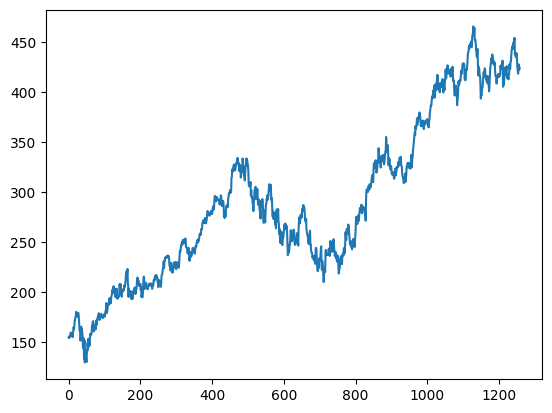

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
print(df1)

[[0.07488902]
 [0.07275346]
 [0.07827756]
 ...
 [0.88706214]
 [0.87074799]
 [0.87726769]]


In [24]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - loss: 0.0679 - val_loss: 0.0852
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - loss: 0.0071 - val_loss: 0.0157
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - loss: 0.0039 - val_loss: 0.0526
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0026 - val_loss: 0.0227
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0019 - val_loss: 0.0139
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2

In [32]:
import tensorflow as tf
tf.__version__
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

254.89539684202228

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

399.54206344502205

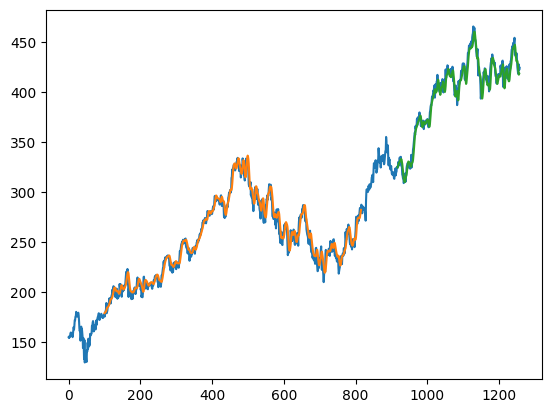

In [37]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.8566488963742624,
 0.8657404273864495,
 0.87545583711814,
 0.8734949845765587,
 0.8479733753601248,
 0.8516575032113809,
 0.8418528770966189,
 0.8428927658141716,
 0.8332665724655528,
 0.8407536622098755,
 0.8526973919289336,
 0.8298200218462031,
 0.8282156714300521,
 0.826700446545259,
 0.8068239085733764,
 0.8187676382924347,
 0.8439624538938908,
 0.870226775871638,
 0.8819922545279812,
 0.8926584274458667,
 0.8948867474332347,
 0.9062065984327896,
 0.8933121055275364,
 0.9167242287984125,
 0.9065631005582202,
 0.9013340393117182,
 0.8884395464064649,
 0.8971744844415077,
 0.894797621901877,
 0.8850227042975676,
 0.8917967897910293,
 0.8632447308050089,
 0.852667683418481,
 0.8509147904500676,
 0.849488600244918,
 0.8301171978024424,
 0.845477678778684,
 0.8536480642634146,
 0.8488350130149622,
 0.8502611123683979,
 0.8586396391297242,
 0.8574511170081951,
 0.8496668513076331,
 0.8514495436382132,
 0.8557279325502338,
 0.857569951050005,
 0.8835075702644883,
 0.8748616669090892,
 

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



[0.8687432]
101
1 day input [0.86574043 0.87545584 0.87349498 0.84797338 0.8516575  0.84185288
 0.84289277 0.83326657 0.84075366 0.85269739 0.82982002 0.82821567
 0.82670045 0.80682391 0.81876764 0.84396245 0.87022678 0.88199225
 0.89265843 0.89488675 0.9062066  0.89331211 0.91672423 0.9065631
 0.90133404 0.88843955 0.89717448 0.89479762 0.8850227  0.89179679
 0.86324473 0.85266768 0.85091479 0.8494886  0.8301172  0.84547768
 0.85364806 0.84883501 0.85026111 0.85863964 0.85745112 0.84966685
 0.85144954 0.85572793 0.85756995 0.88350757 0.87486167 0.87524797
 0.88540901 0.88077411 0.89669915 0.89842233 0.82063946 0.83258319
 0.82690841 0.8358216  0.86172942 0.87732765 0.86874126 0.85528221
 0.87019707 0.87664436 0.88166546 0.84633932 0.84859734 0.85462863
 0.84779503 0.84246622 0.85476136 0.86009027 0.88747888 0.87259374
 0.87399294 0.89638026 0.89703521 0.91555233 0.93103283 0.93386104
 0.94115471 0.93314649 0.94999649 0.95169342 0.944876   0.95773678
 0.96628084 0.91546303 0.91439125 0

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

1258

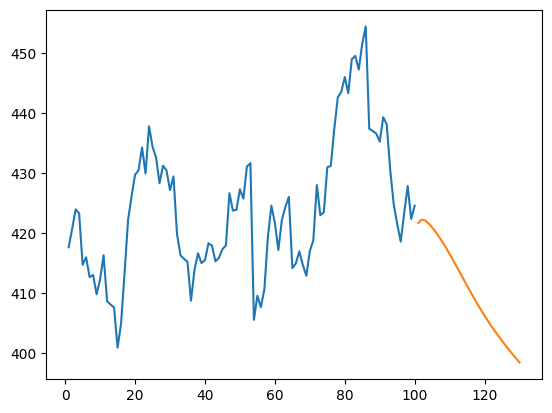

In [43]:
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
len(df1)

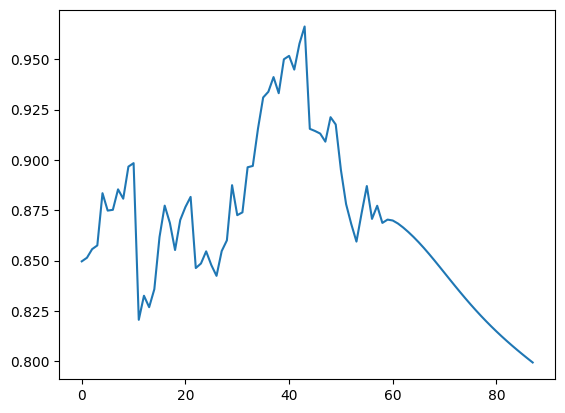

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

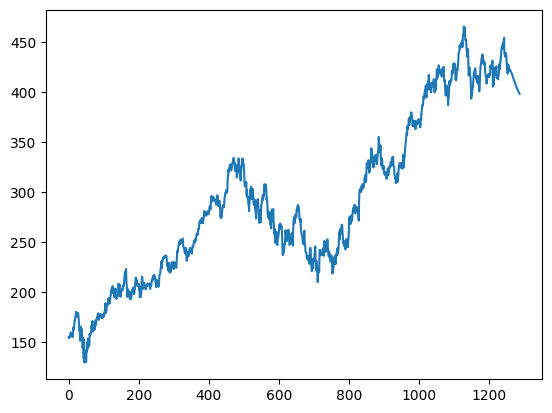

In [45]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)